In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split

In [2]:
# NOTE: change destination folder of dataset to suit.
sentiment140_data = pd.read_csv("datasets/training.1600000.processed.noemoticon.csv", 
                                encoding="ISO-8859-1", header=None, names=["target","id","date","flag","user","text"])

In [3]:
sentiment140_data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Drop columns that arent needed

In [4]:
data = sentiment140_data.drop(["id","date","flag","user"], axis=1)

In [5]:
data

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


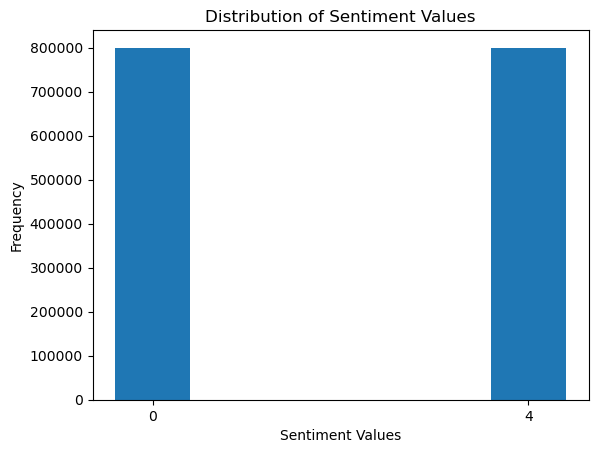

In [6]:
# Bar chart to check for data imbalance.
value_counts = data["target"].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Sentiment Values")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Values")
plt.xticks(value_counts.index)
plt.show()

### Convert sentiment target values from integer to string

In [7]:
LABEL_MAP = {0:"Negative", 2:"Neutral", 4:"Positive"}
def label_decoder(label):
    return LABEL_MAP[label]

In [8]:
data.target = data.target.apply(lambda x: label_decoder(x))
data

,target,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


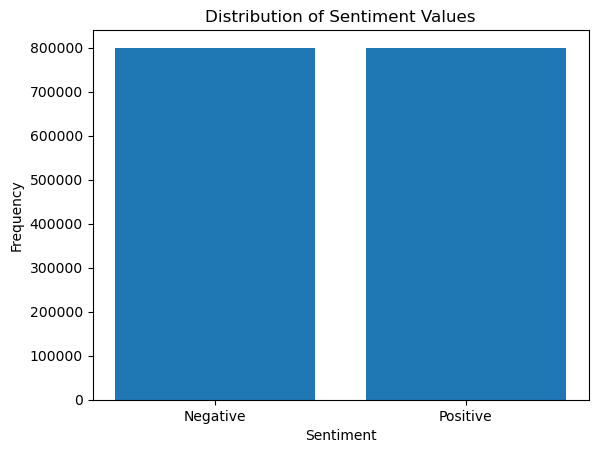

In [9]:
value_counts = data["target"].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Values")
plt.xticks(value_counts.index)
plt.show()

## Data Preprocessing

In [10]:
#TODO: remove after testing
prep_data = data

In [11]:
data = prep_data

In [12]:
nltk.download('stopwords', quiet=True)

True

In [13]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [14]:
def preprocess(text, stem=False):
    text = re.sub(TEXT_RE, " ", str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
data["text"] = data["text"].apply(lambda x: preprocess(x))
data.head()

## Train Test Split

In [ ]:
TRAIN_SIZE = 0.75
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAIN_SIZE, random_state=42)

In [ ]:
X.head()

In [ ]:
y.head()